In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from rvr import RVR
# Automatically reload imports.
%load_ext autoreload
%autoreload 2

In [3]:
def data(N, sigma=0.1, l=-1, r=1):

    x = np.sort(np.random.rand(N)) * (r - l) + l

    eps = np.random.normal(scale=sigma, size=N)

    return x, np.sin(x + eps) + eps

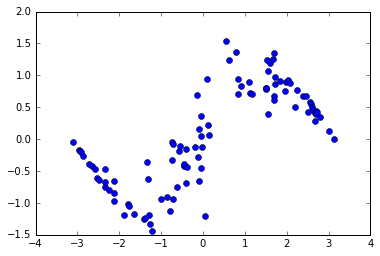

In [4]:
x, y = data(100, sigma=0.3, l=-np.pi, r=np.pi)
plt.plot(x, y, 'o')

In [5]:
rvr = RVR()
rvr.fit(x.reshape(-1, 1), y)

RVR(bias_used=True, degree=3, gamma=0.1, kernel='rbf', n_iter=3000,
  n_tries=(3,), threshold_alpha=1000000000.0, tol=0.001, verbose=False)

In [6]:
rvr.predict(0)

array([ 0.09524732])

In [7]:
x_test = np.linspace(-4, 4, 100)
y_test = rvr.predict(x_test.reshape(-1, 1))

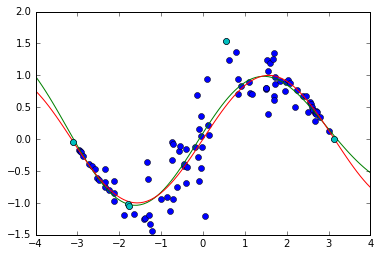

In [8]:
plt.plot(x, y, 'o')
plt.plot(x_test, y_test)
plt.plot(x_test, np.sin(x_test))
plt.plot(x[rvr.relevance_ - 1], y[rvr.relevance_ - 1], 'o')

In [27]:
N = np.array([10, 20, 30, 50, 100, 200, 400, 800, 1000])
upper_bound = np.zeros(N.shape)
evidence = np.zeros(N.shape)
for i in xrange(N.shape[0]):
    x, y = data(N[i], sigma=0.3, l=-np.pi, r=np.pi)
    rvr = RVR(n_iter=4000, threshold_alpha=1e12)
    rvr.fit(x.reshape(-1, 1), y)
    evidence[i], upper_bound[i] = rvr.evidence()

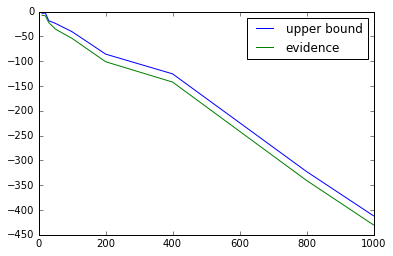

In [28]:
plt.plot(N, upper_bound, label='upper bound')
plt.plot(N, evidence, label='evidence')
plt.legend(loc='best')

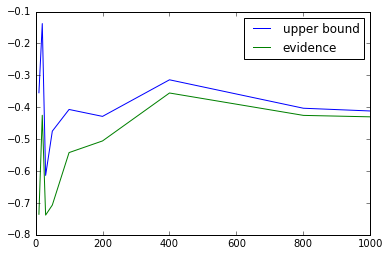

In [29]:
plt.plot(N, upper_bound/N, label='upper bound')
plt.plot(N, evidence/N, label='evidence')
plt.legend(loc='best')

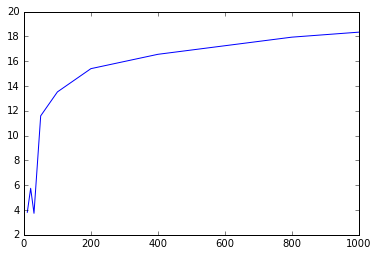

In [30]:
plt.plot(N, upper_bound - evidence)

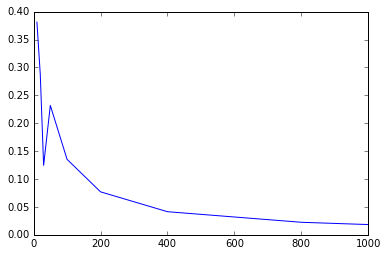

In [31]:
plt.plot(N, (upper_bound - evidence)/N)

In [32]:
N = np.array([10, 20, 30, 50, 100, 200, 400, 800, 1000])
upper_bound = np.zeros(N.shape)
evidence = np.zeros(N.shape)
for i in xrange(N.shape[0]):
    x, y = data(N[i], sigma=0.3, l=-np.pi, r=np.pi)
    rvr = RVR(kernel='poly', degree=4, n_iter=4000, threshold_alpha=1e12)
    rvr.fit(x.reshape(-1, 1), y)
    evidence[i], upper_bound[i] = rvr.evidence()

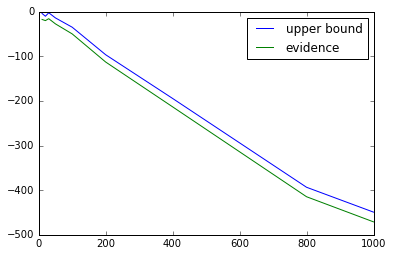

In [33]:
plt.plot(N, upper_bound, label='upper bound')
plt.plot(N, evidence, label='evidence')
plt.legend(loc='best')

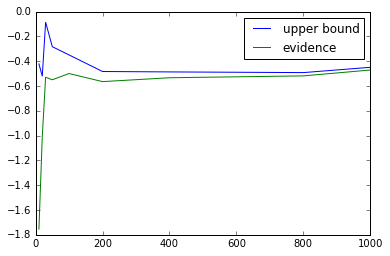

In [34]:
plt.plot(N, upper_bound/N, label='upper bound')
plt.plot(N, evidence/N, label='evidence')
plt.legend(loc='best')

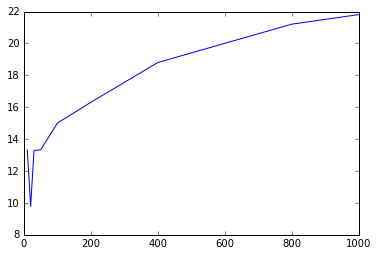

In [35]:
plt.plot(N, upper_bound - evidence)

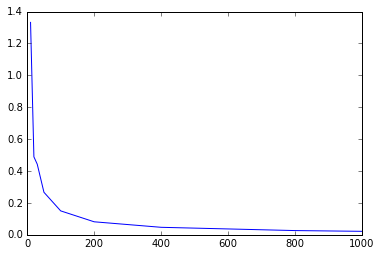

In [36]:
plt.plot(N, (upper_bound - evidence)/N)